# **# Assignment : Rajwinder Singh**

# Title : Order Delivery Time Prediction

# Linear Regression Assigment

# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis

import numpy as np
import pandas as pd
import statsmodels #import library
import statsmodels.api as sm #import library
import sklearn #import library
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [3]:
# Importing the file porter_data_1.csv
porter = pd.read_csv("porterdata.csv")
porter.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [4]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
porter[['actual_delivery_time', 'created_at']] = porter[['actual_delivery_time', 'created_at']].apply(pd.to_datetime)


In [5]:
porter.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  
0                      21.0     34.44  
1                       2.0     27.60  
2                      18.0     11.56  
3                       8.0     31.80  
4                       7.0      8.20

In [6]:
porter.store_primary_category.median()

38.0

In [7]:
porter['store_primary_category'].value_counts()

store_primary_category
4     18183
55    15745
46    15586
13     9915
58     8995
      ...  
1        10
43        9
8         2
21        1
3         1
Name: count, Length: 73, dtype: int64

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [8]:
# Convert categorical features to category type
porter['store_primary_category'] = porter['store_primary_category'].astype('category')

In [9]:
porter['store_primary_category'].value_counts()

store_primary_category
4     18183
55    15745
46    15586
13     9915
58     8995
      ...  
1        10
43        9
8         2
3         1
21        1
Name: count, Length: 73, dtype: int64

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [10]:
# Calculate time taken in minutes
porter['delivery_minutes'] = (porter['actual_delivery_time'] - porter['created_at']).dt.total_seconds() / 60

In [11]:
porter.head()

market_id          created_at actual_delivery_time store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_minutes  
0                      21.0     34.44              47.0  
1                       2.0     27.60              44.0  
2                      18.0     11.56              55.0  
3                       8.0     31.80              59.0  
4                       7.0      8.20              46.0

In [12]:
porter = porter.drop(columns=['delivery_duration'])

KeyError: "['delivery_duration'] not found in axis"

In [13]:
porter.head()

market_id          created_at actual_delivery_time store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_minutes  
0                      21.0     34.44              47.0  
1                       2.0     27.60              44.0  
2                      18.0     11.56              55.0  
3                       8.0     31.80              59.0  
4                       7.0      8.20              46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [14]:
# Extract the hour and day of week from the 'created_at' timestamp

porter['order_hour'] = porter['created_at'].dt.hour
porter['order_weekday_name'] = porter['created_at'].dt.day_name()





In [15]:
porter.head()

market_id          created_at actual_delivery_time store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_minutes  order_hour  \
0                      21.0     34.44              47.0          22   
1                       2.0     27.60              44.0          21   
2                      18.0     11.56              55.0           0   
3                       8.0     31.80              59.0           3   
4                       7.0      8.20              46.0           2   

  order_weekday_name  
0             Friday  
1            Tuesday  
2             Monday  
3           Thursday  
4            Tuesday

In [62]:
porter['isWeekend'] = porter['order_weekday_name'].isin(['Saturday', 'Sunday']).astype(int)
print(porter['isWeekend'].value_counts())

isWeekend
0    115026
1     60751
Name: count, dtype: int64


In [64]:
porter.head()

market_id          created_at actual_delivery_time store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_minutes  order_hour  \
0                      21.0     34.44              47.0          22   
1                       2.0     27.60              44.0          21   
2                      18.0     11.56              55.0           0   
3                       8.0     31.80              59.0           3   
4                       7.0      8.20              46.0           2   

  order_weekday_name  isWeekend  
0             Friday          0  
1            Tuesday          0  
2             Monday          0  
3           Thursday          0  
4            Tuesday          0

In [66]:
porter.isWeekend.value_counts()

isWeekend
0    115026
1     60751
Name: count, dtype: int64

In [67]:
# Drop unnecessary columns
porter1 = porter.drop(columns=['created_at','actual_delivery_time'])
porter1.head()

market_id store_primary_category  order_protocol  total_items  subtotal  \
0        1.0                      4             1.0            4      3441   
1        2.0                     46             2.0            1      1900   
2        2.0                     36             3.0            4      4771   
3        1.0                     38             1.0            1      1525   
4        1.0                     38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  delivery_minutes  \
0                14.0                      21.0     34.44              47.0   
1                 2.0                       2.0     27.60              44.0   
2                 6.0                      18.0     11.56              55.0   
3                 6.0                       8.0     31.80              59.0   
4                 5.0                       7.0      8.20              46.0   

   order_hour order_weekday_name  isWeekend  
0          22             Friday          0  
1          21            Tuesday          0  
2           0             Monday          0  
3           3           Thursday          0  
4           2            Tuesday          0

In [68]:
# Drop unnecessary columns
porter1 = porter.drop(columns=['min_item_price','max_item_price'])
porter1.head()

market_id          created_at actual_delivery_time store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

   order_protocol  total_items  subtotal  num_distinct_items  \
0             1.0            4      3441                   4   
1             2.0            1      1900                   1   
2             3.0            4      4771                   3   
3             1.0            1      1525                   1   
4             1.0            2      3620                   2   

   total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                   33.0                14.0                      21.0   
1                    1.0                 2.0                       2.0   
2                    8.0                 6.0                      18.0   
3                    5.0                 6.0                       8.0   
4                    5.0                 5.0                       7.0   

   distance  delivery_minutes  order_hour order_weekday_name  isWeekend  
0     34.44              47.0          22             Friday          0  
1     27.60              44.0          21            Tuesday          0  
2     11.56              55.0           0             Monday          0  
3     31.80              59.0           3           Thursday          0  
4      8.20              46.0           2            Tuesday          0

In [69]:

porter1['order_weekday_name'].value_counts()

order_weekday_name
Saturday     30858
Sunday       29893
Friday       25004
Monday       24202
Thursday     22584
Wednesday    21753
Tuesday      21483
Name: count, dtype: int64

In [70]:
#drop subtotal
# Drop unnecessary columns
porter1 = porter.drop(columns=['subtotal'])
porter1.head()

market_id          created_at actual_delivery_time store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

   order_protocol  total_items  num_distinct_items  min_item_price  \
0             1.0            4                   4             557   
1             2.0            1                   1            1400   
2             3.0            4                   3             820   
3             1.0            1                   1            1525   
4             1.0            2                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_minutes  order_hour  \
0                      21.0     34.44              47.0          22   
1                       2.0     27.60              44.0          21   
2                      18.0     11.56              55.0           0   
3                       8.0     31.80              59.0           3   
4                       7.0      8.20              46.0           2   

  order_weekday_name  isWeekend  
0             Friday          0  
1            Tuesday          0  
2             Monday          0  
3           Thursday          0  
4            Tuesday          0

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [71]:
# Define target variable (y) and features (X)
y=porter1['delivery_minutes']
X = porter1.drop(['delivery_minutes'], axis=1)


In [72]:
y.head()

0    47.0
1    44.0
2    55.0
3    59.0
4    46.0
Name: delivery_minutes, dtype: float64

In [73]:
X.head()

market_id          created_at actual_delivery_time store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

   order_protocol  total_items  num_distinct_items  min_item_price  \
0             1.0            4                   4             557   
1             2.0            1                   1            1400   
2             3.0            4                   3             820   
3             1.0            1                   1            1525   
4             1.0            2                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  order_hour order_weekday_name  \
0                      21.0     34.44          22             Friday   
1                       2.0     27.60          21            Tuesday   
2                      18.0     11.56           0             Monday   
3                       8.0     31.80           3           Thursday   
4                       7.0      8.20           2            Tuesday   

   isWeekend  
0          0  
1          0  
2          0  
3          0  
4          0

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [74]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [75]:
X_train.head()

market_id          created_at actual_delivery_time  \
42111         3.0 2015-02-09 20:35:20  2015-02-09 21:07:20   
58452         2.0 2015-01-31 02:27:26  2015-01-31 03:38:26   
20644         4.0 2015-01-23 03:51:10  2015-01-23 04:53:10   
79735         4.0 2015-01-24 02:17:22  2015-01-24 03:11:22   
167933        1.0 2015-01-22 02:22:12  2015-01-22 03:18:12   

       store_primary_category  order_protocol  total_items  \
42111                       7             2.0            1   
58452                      46             5.0            5   
20644                      45             2.0            6   
79735                      45             2.0            3   
167933                      4             5.0            5   

        num_distinct_items  min_item_price  max_item_price  \
42111                    1            1350            1350   
58452                    5             495             900   
20644                    3            1195            1450   
79735                    3             975            1450   
167933                   5            1200            2625   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
42111                    23.0                20.0                      19.0   
58452                   112.0               100.0                     207.0   
20644                    80.0                79.0                     115.0   
79735                   127.0               106.0                     173.0   
167933                   44.0                44.0                      61.0   

        distance  order_hour order_weekday_name  isWeekend  
42111       9.60          20             Monday          0  
58452      34.56           2           Saturday          1  
20644      34.92           3             Friday          0  
79735      25.76           2           Saturday          1  
167933     17.72           2           Thursday          0

In [76]:
# Define numerical and categorical columns for easy EDA and data manipulation
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 42111 to 38408
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 140621 non-null  float64       
 1   created_at                140621 non-null  datetime64[ns]
 2   actual_delivery_time      140621 non-null  datetime64[ns]
 3   store_primary_category    140621 non-null  category      
 4   order_protocol            140621 non-null  float64       
 5   total_items               140621 non-null  int64         
 6   num_distinct_items        140621 non-null  int64         
 7   min_item_price            140621 non-null  int64         
 8   max_item_price            140621 non-null  int64         
 9   total_onshift_dashers     140621 non-null  float64       
 10  total_busy_dashers        140621 non-null  float64       
 11  total_outstanding_orders  140621 non-null  float64       
 12  dist

<Figure size 1500x1000 with 0 Axes>

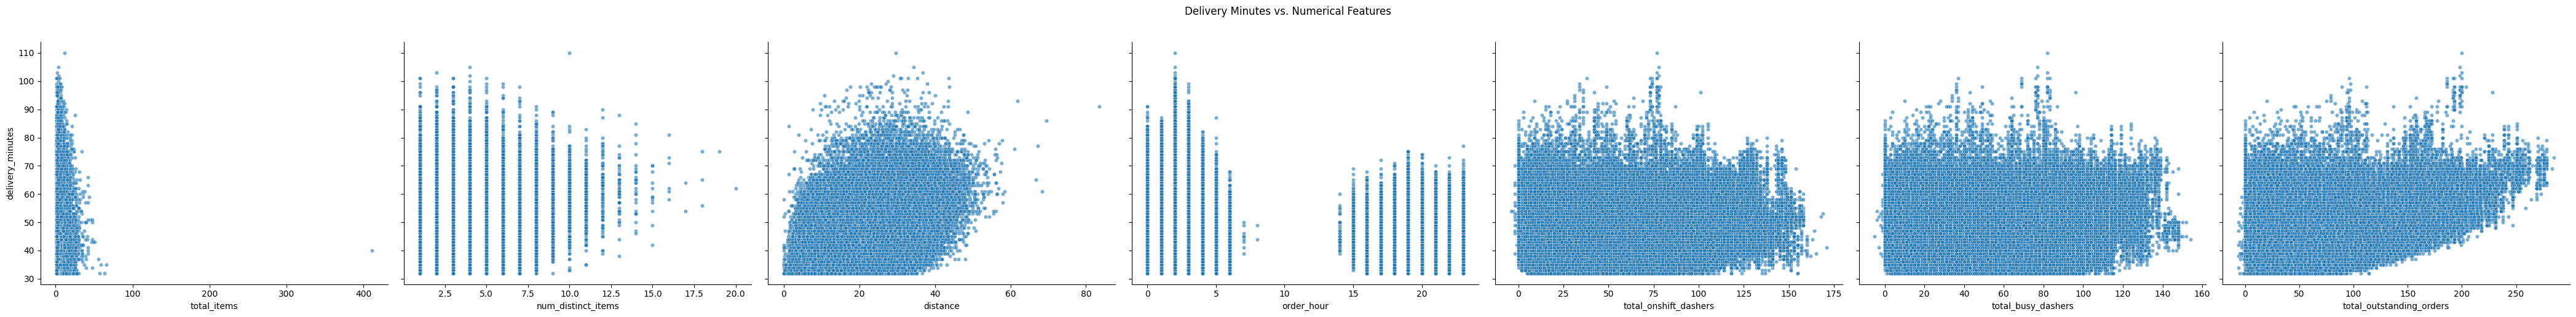

In [77]:
plt.figure(figsize=(15, 10))
sns.pairplot(porter1,
             x_vars=['total_items', 'num_distinct_items',
                    'distance','order_hour', 'total_onshift_dashers',
                    'total_busy_dashers', 'total_outstanding_orders'],
             y_vars=['delivery_minutes'],
             height=5,  # Increased from default
             aspect=1.2,  # Wider plots
             kind='scatter',
             plot_kws={'alpha': 0.6, 's': 20})  # Larger, semi-transparent points
plt.suptitle('Delivery Minutes vs. Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

In [78]:
numerical_cols = [
    'delivery_minutes','total_items', 'num_distinct_items',
    'distance',
    'order_hour', 'total_onshift_dashers',
    'total_busy_dashers', 'total_outstanding_orders'
]

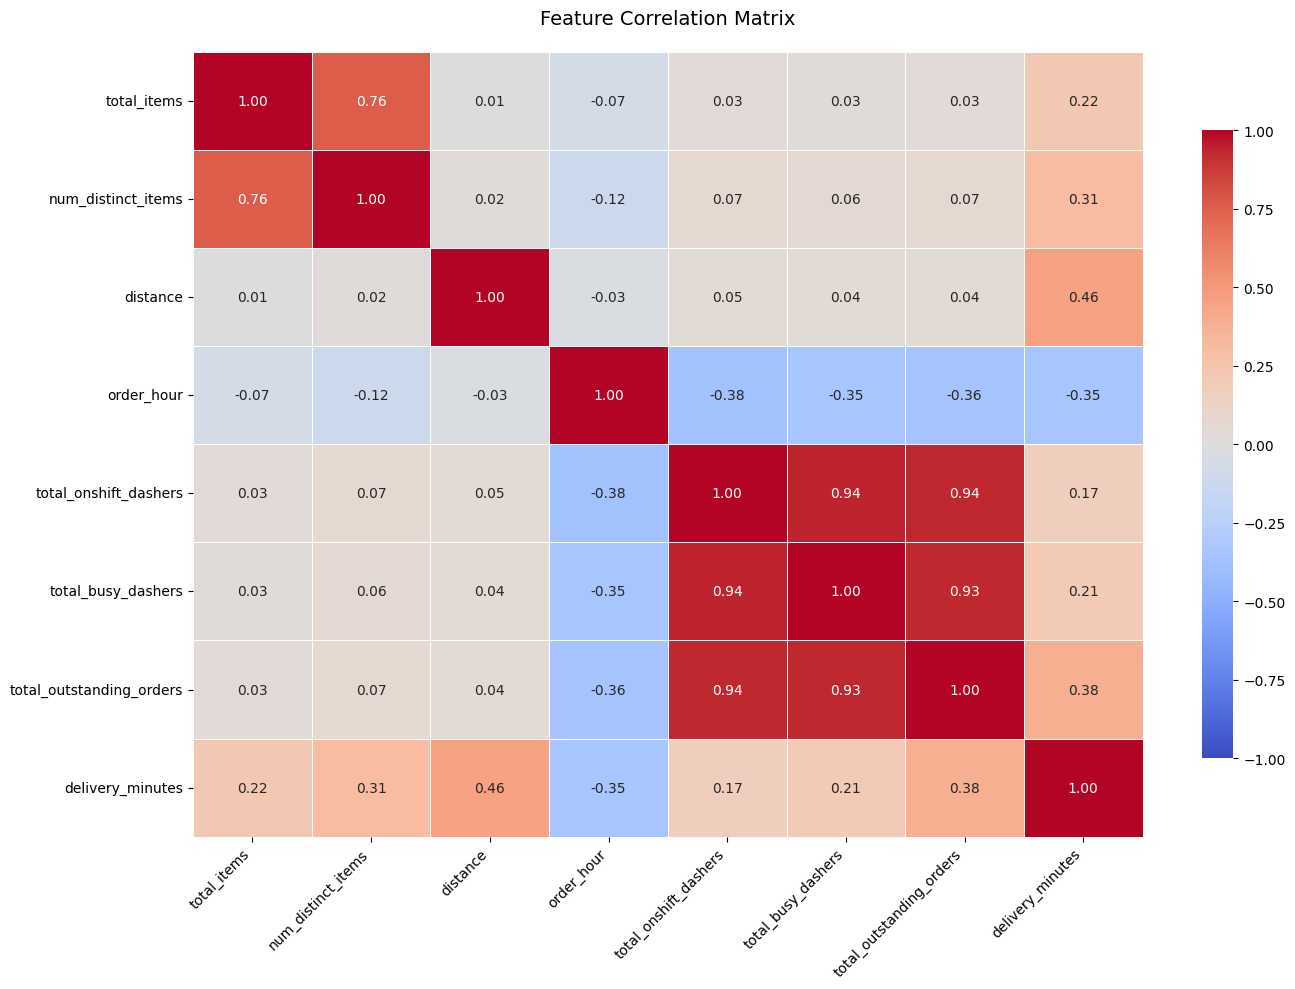

In [79]:
# Calculate correlation matrix for all numerical features
corr_matrix = porter1[['total_items', 'num_distinct_items',
                      'distance',
                      'order_hour', 'total_onshift_dashers',
                      'total_busy_dashers', 'total_outstanding_orders',
                      'delivery_minutes']].corr()

# Create enhanced correlation plot
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
           center=0, vmin=-1, vmax=1, linewidths=0.5,
           annot_kws={'size': 10}, cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

delivery_minutes:
1. distance (0.46)  
2. total_outstanding_orders (0.38)
3. num_distinct_items (0.31)
4. Order Hour (-0.35)
5.total_tems (0.22)


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

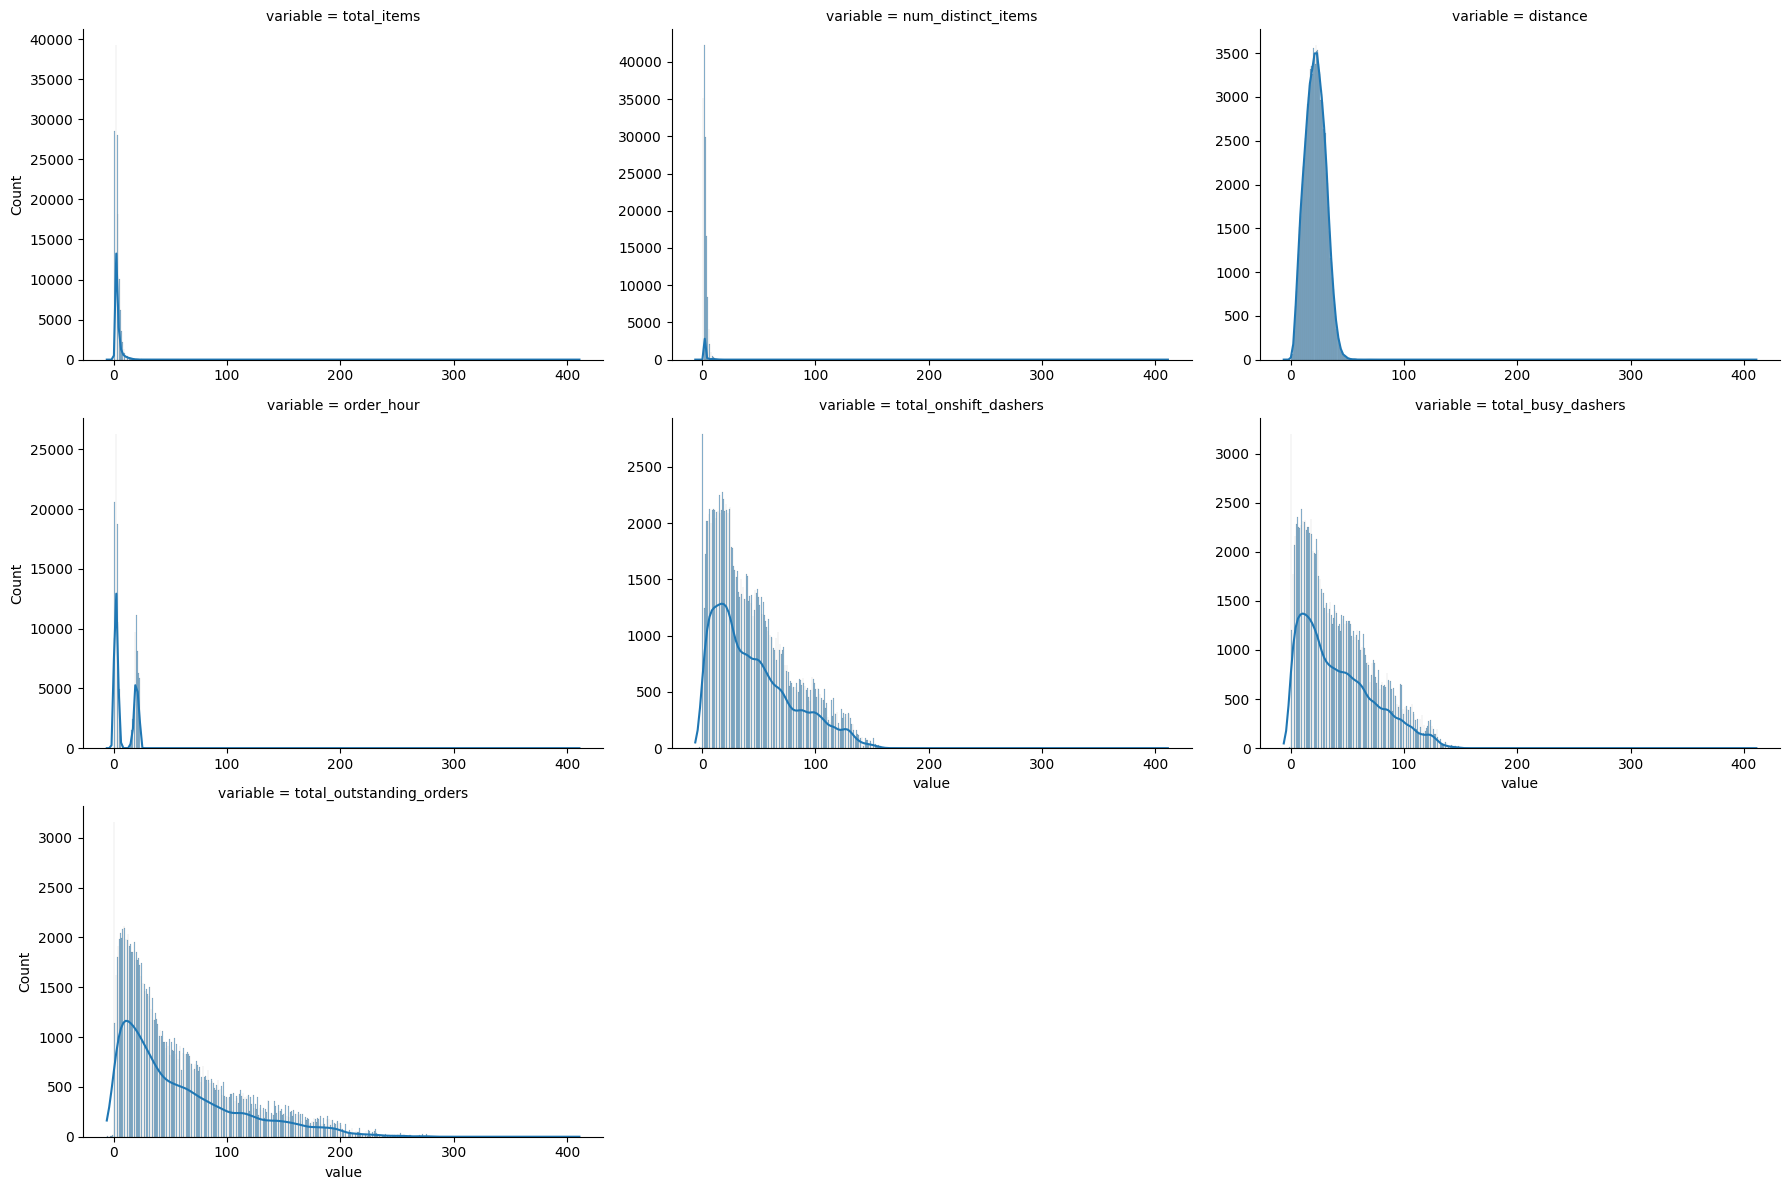

In [80]:
numerical_cols_train = [
    'total_items', 'num_distinct_items',
    'distance',
    'order_hour', 'total_onshift_dashers',
    'total_busy_dashers', 'total_outstanding_orders'
]
sns.displot(data=X_train[numerical_cols_train].melt(), x='value', col='variable',
            kind='hist', kde=True, col_wrap=3, height=4, aspect=1.5,
            facet_kws={'sharex': False, 'sharey': False})
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [81]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 42111 to 38408
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 140621 non-null  float64       
 1   created_at                140621 non-null  datetime64[ns]
 2   actual_delivery_time      140621 non-null  datetime64[ns]
 3   store_primary_category    140621 non-null  category      
 4   order_protocol            140621 non-null  float64       
 5   total_items               140621 non-null  int64         
 6   num_distinct_items        140621 non-null  int64         
 7   min_item_price            140621 non-null  int64         
 8   max_item_price            140621 non-null  int64         
 9   total_onshift_dashers     140621 non-null  float64       
 10  total_busy_dashers        140621 non-null  float64       
 11  total_outstanding_orders  140621 non-null  float64       
 12  dist

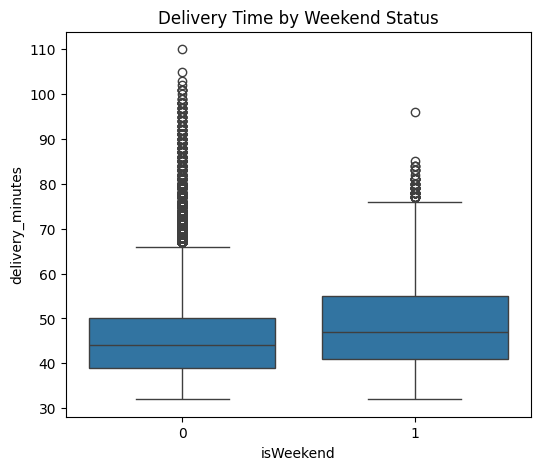

In [82]:
# Distribution of categorical columns

plt.figure(figsize=(6, 5))
sns.boxplot(x='isWeekend', y='delivery_minutes', data=porter1)
plt.title('Delivery Time by Weekend Status')
plt.show()

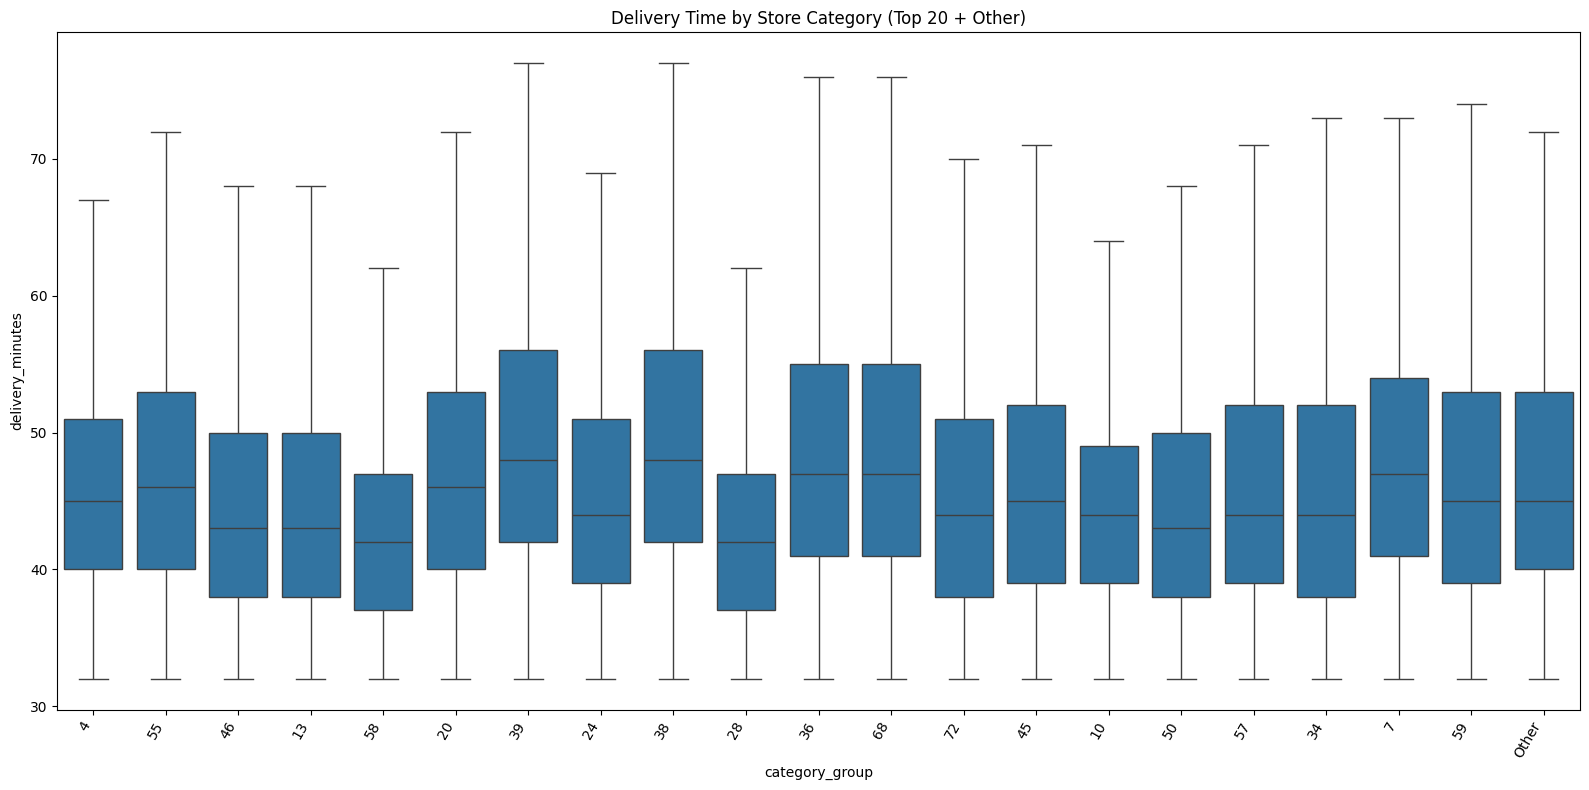

In [83]:
top_categories = porter1['store_primary_category'].value_counts().nlargest(20).index
porter1['category_group'] = porter1['store_primary_category'].astype(str).where(
    porter1['store_primary_category'].isin(top_categories), 'Other'
)


plt.figure(figsize=(16, 8))
sns.boxplot(
    x='category_group',
    y='delivery_minutes',
    data=porter1,
    order=list(top_categories.astype(str)) + ['Other'],  # Ensure string comparison
    showfliers=False
)
plt.title('Delivery Time by Store Category (Top 20 + Other)')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

In [84]:
porter1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   num_distinct_items        175777 non-null  int64         
 7   min_item_price            175777 non-null  int64         
 8   max_item_price            175777 non-null  int64         
 9   total_onshift_dashers     175777 non-null  float64       
 10  total_busy_dashers        175777 non-null  float64       
 11  total_outstanding_orders  175777 non-null  float64       
 12  di

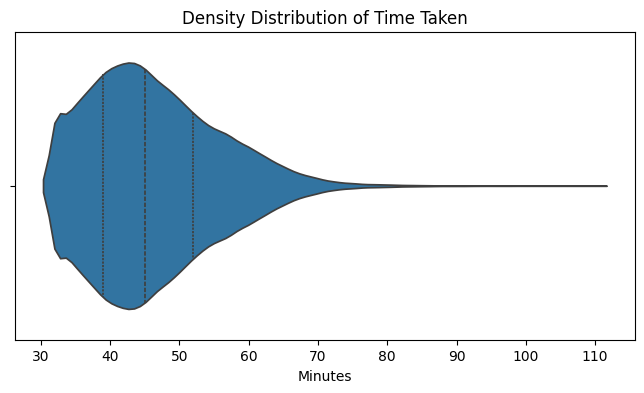

In [85]:
# Distribution of time_taken
plt.figure(figsize=(8, 4))
sns.violinplot(x=porter1['delivery_minutes'], inner='quartile')
plt.title('Density Distribution of Time Taken')
plt.xlabel('Minutes')
plt.show()



#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

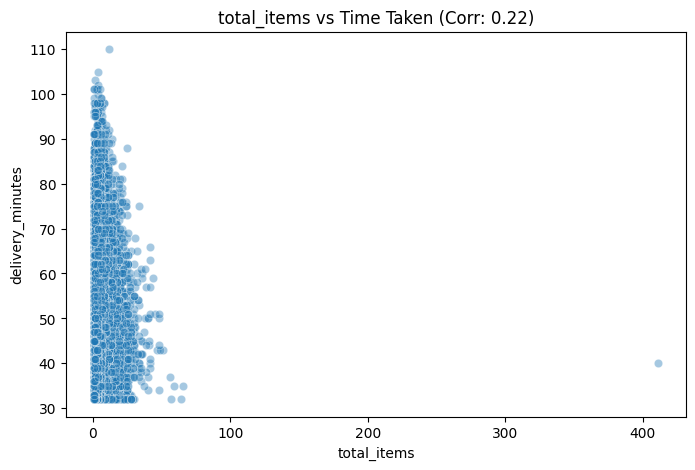

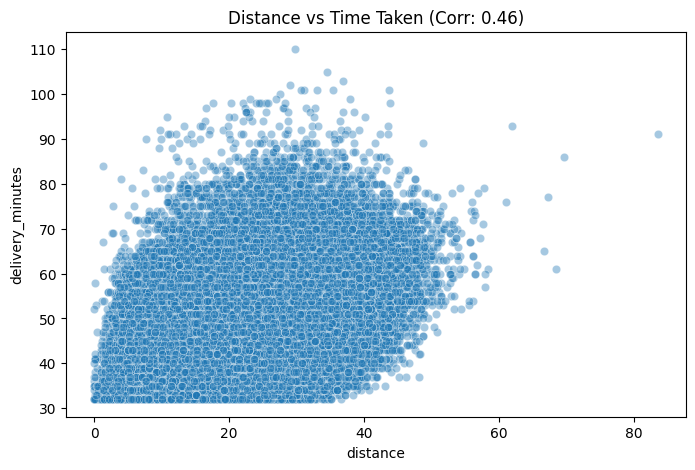

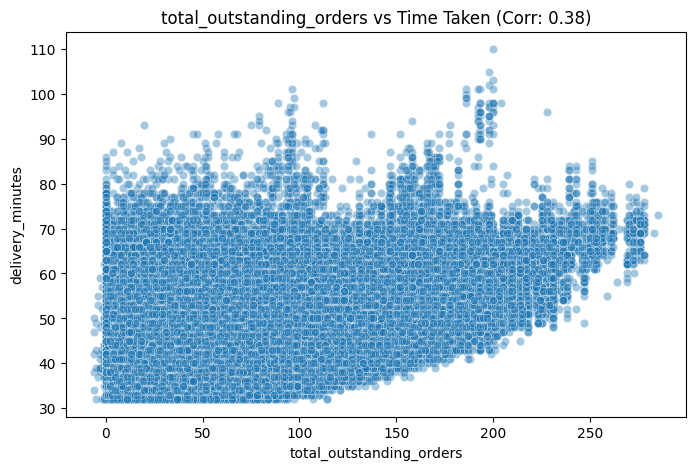

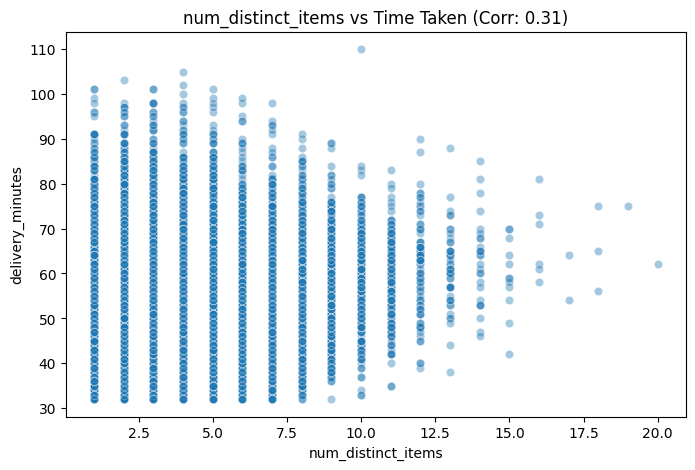

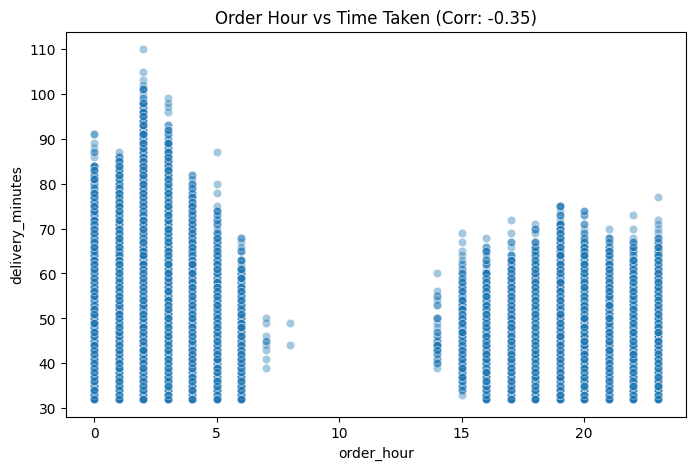

In [86]:
# Scatter plot to visualise the relationship between time_taken and other features

#issweekend

plt.figure(figsize=(8,5))
sns.scatterplot(x='total_items', y='delivery_minutes', data=porter1, alpha=0.4)
plt.title(f'total_items vs Time Taken (Corr: {porter1[["total_items","delivery_minutes"]].corr().iloc[0,1]:.2f})')
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='distance', y='delivery_minutes', data=porter1, alpha=0.4)
plt.title(f'Distance vs Time Taken (Corr: {porter1[["distance","delivery_minutes"]].corr().iloc[0,1]:.2f})')
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='total_outstanding_orders', y='delivery_minutes', data=porter1, alpha=0.4)
plt.title(f'total_outstanding_orders vs Time Taken (Corr: {porter1[["total_outstanding_orders","delivery_minutes"]].corr().iloc[0,1]:.2f})')
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='num_distinct_items', y='delivery_minutes', data=porter1, alpha=0.4)
plt.title(f'num_distinct_items vs Time Taken (Corr: {porter1[["num_distinct_items","delivery_minutes"]].corr().iloc[0,1]:.2f})')
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='order_hour', y='delivery_minutes', data=porter1, alpha=0.4)
plt.title(f'Order Hour vs Time Taken (Corr: {porter1[["order_hour","delivery_minutes"]].corr().iloc[0,1]:.2f})')
plt.show()


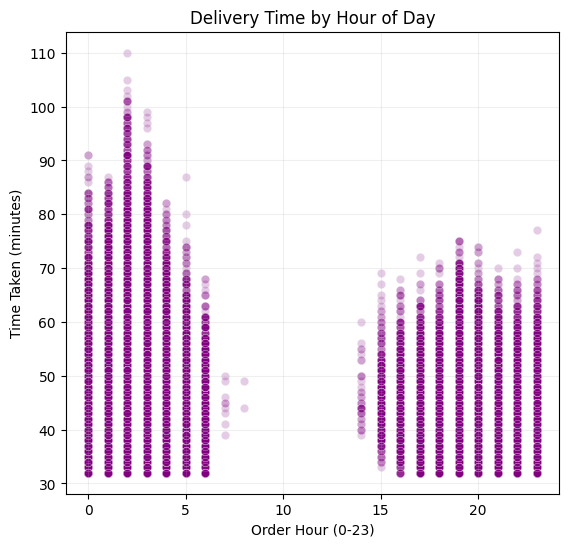

In [87]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(14, 6))

# Scatter plot with transparency
plt.subplot(1, 2, 1)
sns.scatterplot(x='order_hour', y='delivery_minutes', data=porter1, alpha=0.2, color='purple')
plt.title('Delivery Time by Hour of Day')
plt.xlabel('Order Hour (0-23)')
plt.ylabel('Time Taken (minutes)')
plt.grid(alpha=0.2)

Plot issweekend

In [88]:
porter1['isWeekend'].value_counts()

isWeekend
0    115026
1     60751
Name: count, dtype: int64

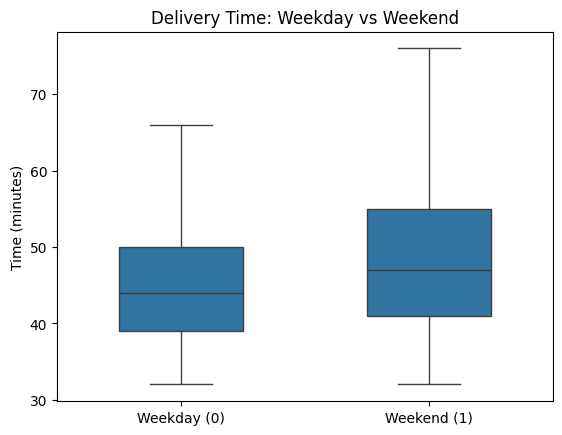

In [89]:
sns.boxplot(x='isWeekend', y='delivery_minutes', data=porter1, width=0.5, showfliers=False,
            order=[0, 1]).set(xticklabels=['Weekday (0)', 'Weekend (1)'],
                              title='Delivery Time: Weekday vs Weekend',
                              xlabel='',
                              ylabel='Time (minutes)');

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

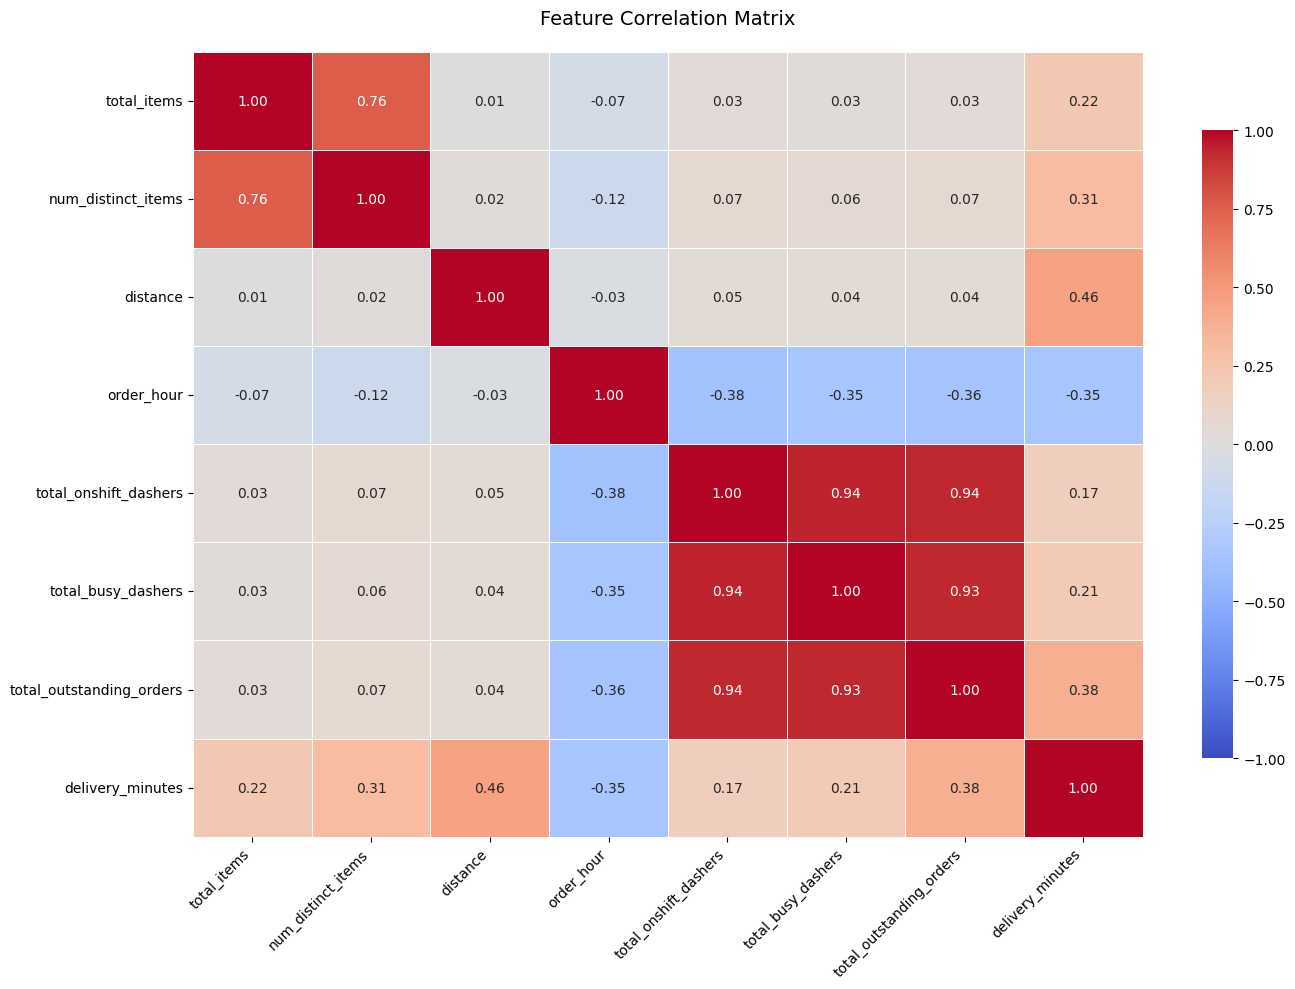

In [90]:
# Plot the heatmap of the correlation matrix

# Calculate correlation matrix for all numerical features
corr_matrix = porter1[['total_items', 'num_distinct_items',
                      'distance',
                      'order_hour', 'total_onshift_dashers',
                      'total_busy_dashers', 'total_outstanding_orders',
                      'delivery_minutes']].corr()

# Create enhanced correlation plot
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
           center=0, vmin=-1, vmax=1, linewidths=0.5,
           annot_kws={'size': 10}, cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [91]:
# Drop 3-5 weakly correlated columns from training dataset

X_train = X_train.drop(columns=['total_onshift_dashers'])
X_train = X_train.drop(columns=['total_busy_dashers'])

In [92]:
X_train.head()

market_id          created_at actual_delivery_time  \
42111         3.0 2015-02-09 20:35:20  2015-02-09 21:07:20   
58452         2.0 2015-01-31 02:27:26  2015-01-31 03:38:26   
20644         4.0 2015-01-23 03:51:10  2015-01-23 04:53:10   
79735         4.0 2015-01-24 02:17:22  2015-01-24 03:11:22   
167933        1.0 2015-01-22 02:22:12  2015-01-22 03:18:12   

       store_primary_category  order_protocol  total_items  \
42111                       7             2.0            1   
58452                      46             5.0            5   
20644                      45             2.0            6   
79735                      45             2.0            3   
167933                      4             5.0            5   

        num_distinct_items  min_item_price  max_item_price  \
42111                    1            1350            1350   
58452                    5             495             900   
20644                    3            1195            1450   
79735                    3             975            1450   
167933                   5            1200            2625   

        total_outstanding_orders  distance  order_hour order_weekday_name  \
42111                       19.0      9.60          20             Monday   
58452                      207.0     34.56           2           Saturday   
20644                      115.0     34.92           3             Friday   
79735                      173.0     25.76           2           Saturday   
167933                      61.0     17.72           2           Thursday   

        isWeekend  
42111           0  
58452           1  
20644           0  
79735           1  
167933          0

In [94]:
porter1 = porter1.drop(columns=['total_onshift_dashers'])
porter1 = porter1.drop(columns=['total_busy_dashers'])

In [95]:
porter1.head()

market_id          created_at actual_delivery_time store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

   order_protocol  total_items  num_distinct_items  min_item_price  \
0             1.0            4                   4             557   
1             2.0            1                   1            1400   
2             3.0            4                   3             820   
3             1.0            1                   1            1525   
4             1.0            2                   2            1425   

   max_item_price  total_outstanding_orders  distance  delivery_minutes  \
0            1239                      21.0     34.44              47.0   
1            1400                       2.0     27.60              44.0   
2            1604                      18.0     11.56              55.0   
3            1525                       8.0     31.80              59.0   
4            2195                       7.0      8.20              46.0   

   order_hour order_weekday_name  isWeekend category_group  
0          22             Friday          0              4  
1          21            Tuesday          0             46  
2           0             Monday          0             36  
3           3           Thursday          0             38  
4           2            Tuesday          0             38

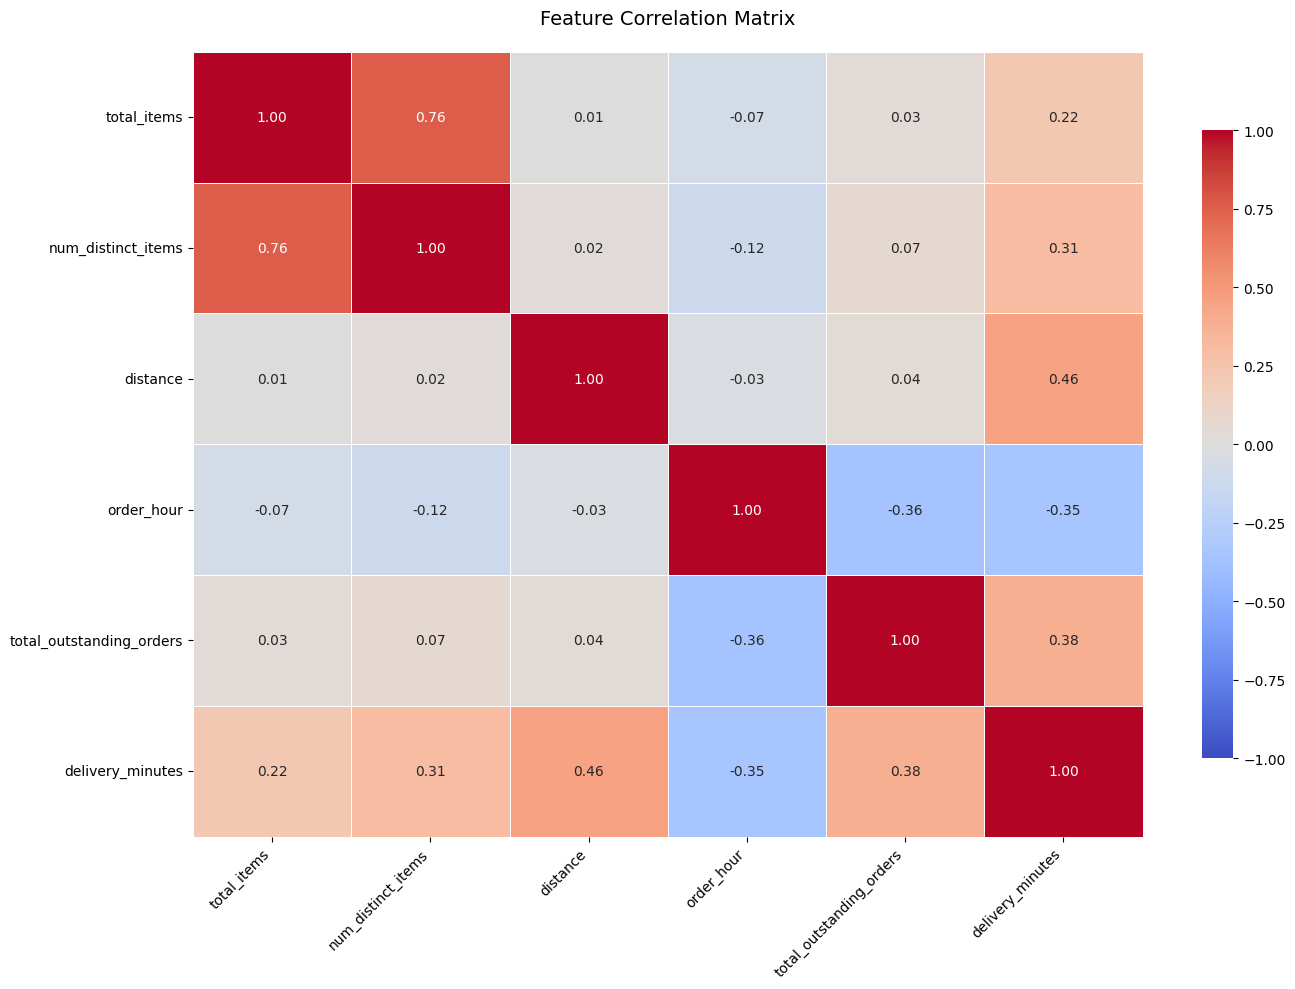

In [97]:
# Plot the heatmap of the correlation matrix

# Calculate correlation matrix for all numerical features
corr_matrix = porter1[['total_items', 'num_distinct_items',
                      'distance',
                      'order_hour', 'total_outstanding_orders',
                      'delivery_minutes']].corr()

# Create enhanced correlation plot
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
           center=0, vmin=-1, vmax=1, linewidths=0.5,
           annot_kws={'size': 10}, cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [98]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 42111 to 38408
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 140621 non-null  float64       
 1   created_at                140621 non-null  datetime64[ns]
 2   actual_delivery_time      140621 non-null  datetime64[ns]
 3   store_primary_category    140621 non-null  category      
 4   order_protocol            140621 non-null  float64       
 5   total_items               140621 non-null  int64         
 6   num_distinct_items        140621 non-null  int64         
 7   min_item_price            140621 non-null  int64         
 8   max_item_price            140621 non-null  int64         
 9   total_outstanding_orders  140621 non-null  float64       
 10  distance                  140621 non-null  float64       
 11  order_hour                140621 non-null  int32         
 12  orde

Important predictors:     
   
num_distinct_items, total_outstanding_orders,   distance,  order_hour,      isWeekend,

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

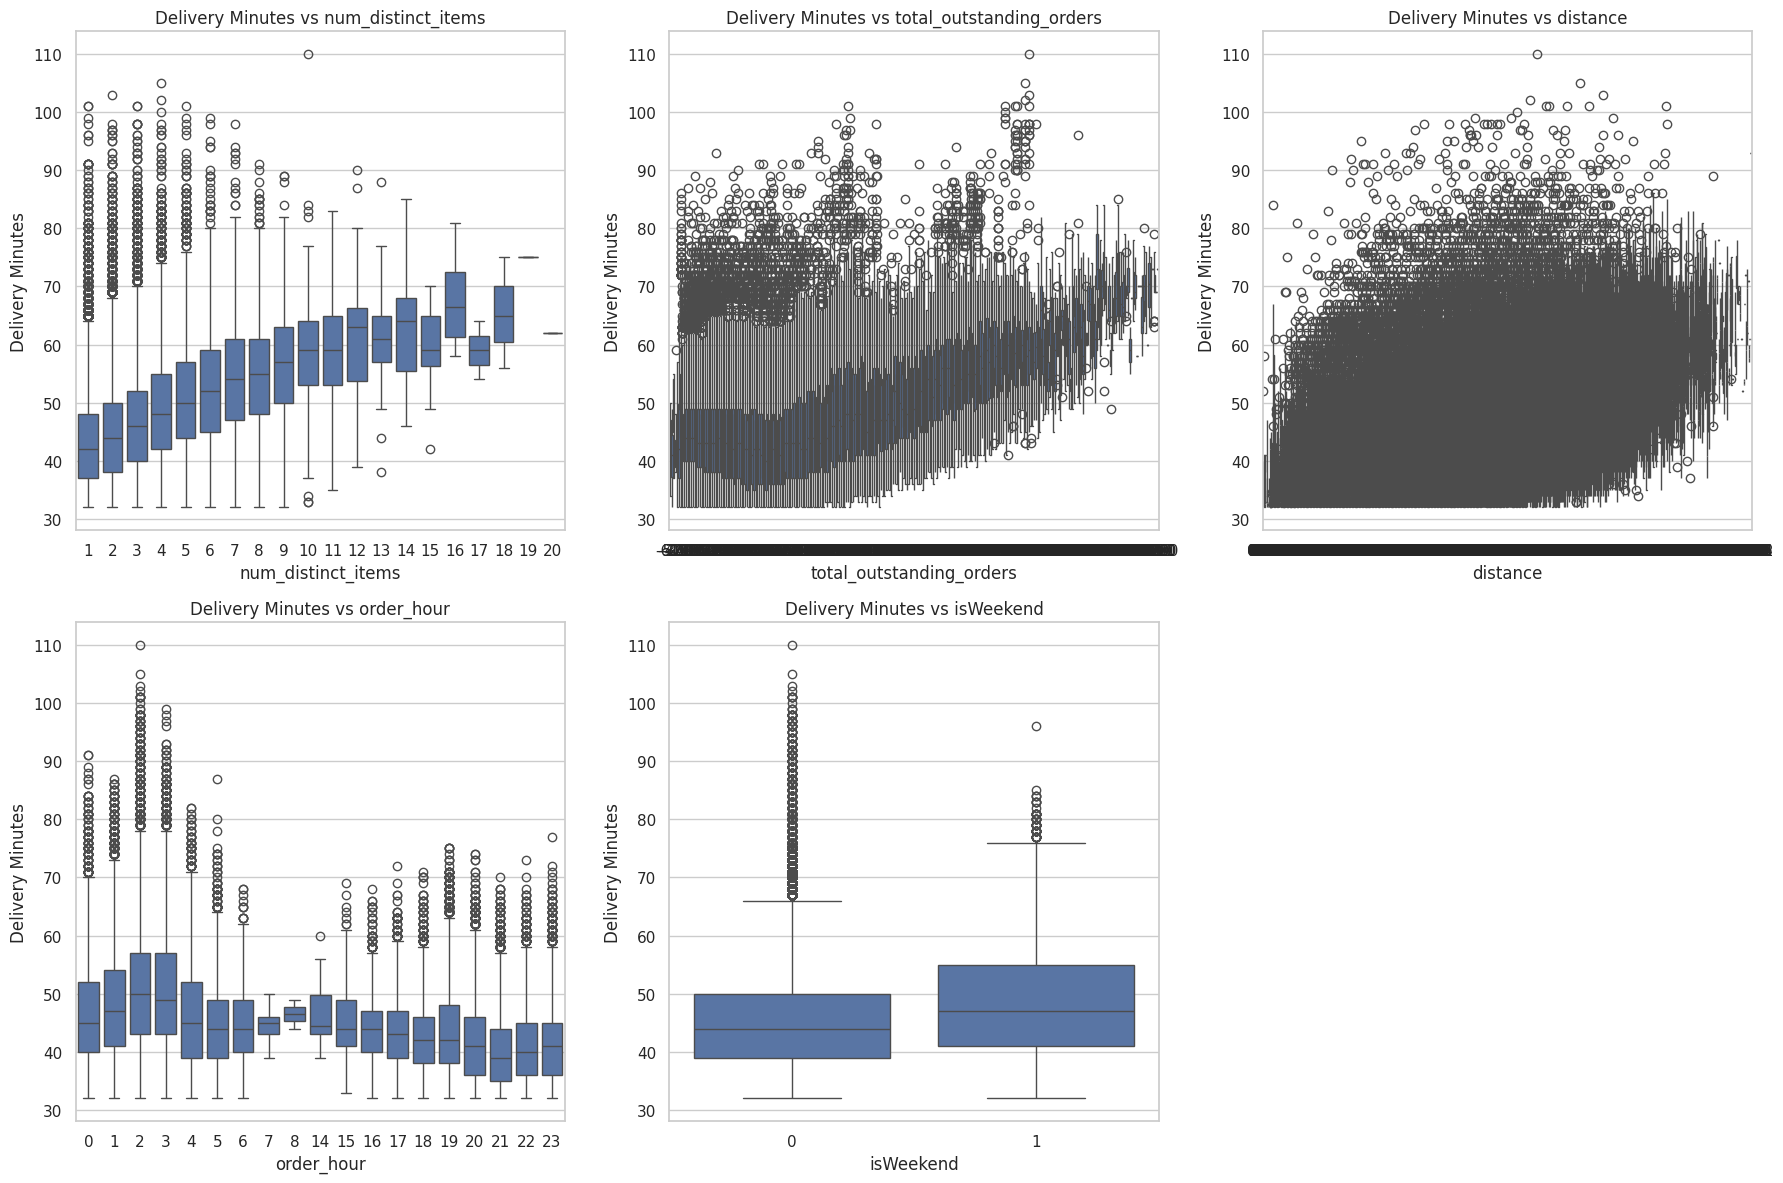

In [99]:
# Boxplot for time_taken

sns.set(style="whitegrid")
variables = ['num_distinct_items', 'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend']

# Create subplots
plt.figure(figsize=(18, 12))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=porter1[var], y=porter1['delivery_minutes'])
    plt.title(f'Delivery Minutes vs {var}')
    plt.xlabel(var)
    plt.ylabel('Delivery Minutes')

plt.tight_layout()
plt.show()



total_outstanding_orders and distance has major outliers

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [102]:
porter1['distance'].describe()

count    175777.000000
mean         21.843090
std           8.748712
min           0.000000
25%          15.360000
50%          21.760000
75%          28.120000
max          83.520000
Name: distance, dtype: float64

In [103]:
porter1['total_outstanding_orders'].describe()

count    175777.000000
mean         58.230115
std          52.731043
min          -6.000000
25%          17.000000
50%          41.000000
75%          85.000000
max         285.000000
Name: total_outstanding_orders, dtype: float64

In [100]:
# Handle outliers

# Define a function to detect outliers using IQR
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Find outliers in 'total_outstanding_orders'
outliers_orders = find_outliers_iqr(porter1, 'total_outstanding_orders')

# Find outliers in 'distance'
outliers_distance = find_outliers_iqr(porter1, 'distance')

# Check how many outliers were found
print("Total Outstanding Orders Outliers:", len(outliers_orders))
print("Distance Outliers:", len(outliers_distance))


Total Outstanding Orders Outliers: 5194
Distance Outliers: 315


In [104]:
Q1 = porter1['total_outstanding_orders'].quantile(0.25)
Q3 = porter1['total_outstanding_orders'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mean_value = porter1['total_outstanding_orders'].mean()

porter1['total_outstanding_orders'] = np.where(
    (porter1['total_outstanding_orders'] < lower_bound) |
    (porter1['total_outstanding_orders'] > upper_bound),
    mean_value,
    porter1['total_outstanding_orders']
)


In [105]:
Q1 = porter1['distance'].quantile(0.25)
Q3 = porter1['distance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mean_value = porter1['distance'].mean()

porter1['distance'] = np.where(
    (porter1['distance'] < lower_bound) |
    (porter1['distance'] > upper_bound),
    mean_value,
    porter1['distance']
)


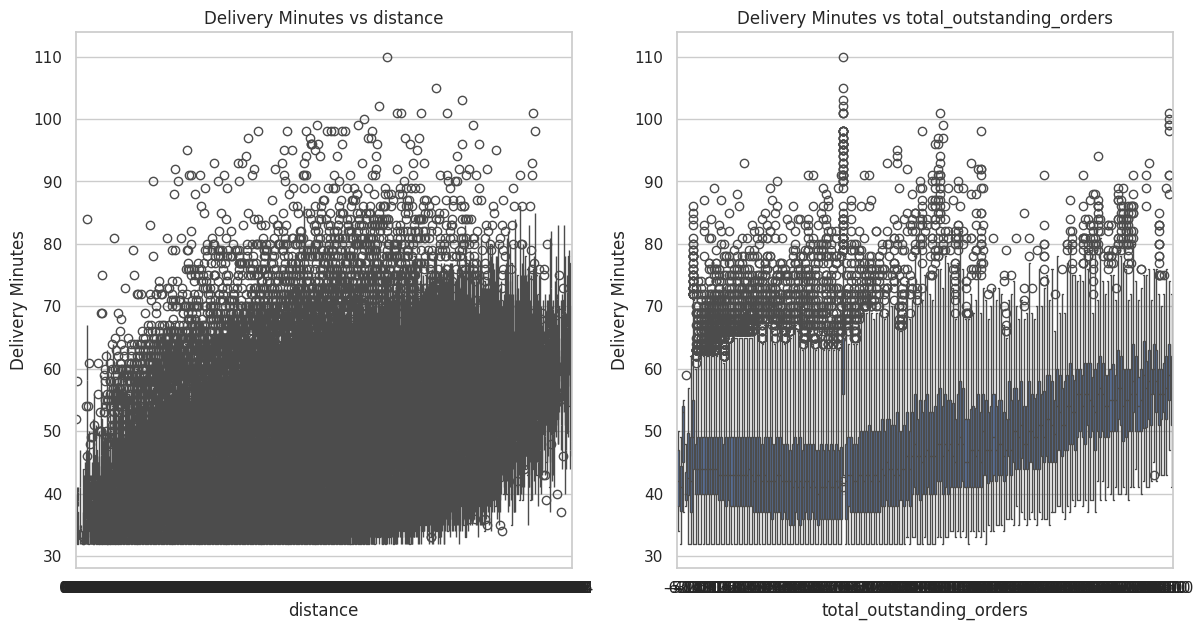

In [106]:
# Boxplot for time_taken

sns.set(style="whitegrid")
variables = ['distance', 'total_outstanding_orders']

# Create subplots
plt.figure(figsize=(18, 12))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=porter1[var], y=porter1['delivery_minutes'])
    plt.title(f'Delivery Minutes vs {var}')
    plt.xlabel(var)
    plt.ylabel('Delivery Minutes')

plt.tight_layout()
plt.show()


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [109]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 42111 to 38408
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 140621 non-null  float64       
 1   created_at                140621 non-null  datetime64[ns]
 2   actual_delivery_time      140621 non-null  datetime64[ns]
 3   store_primary_category    140621 non-null  category      
 4   order_protocol            140621 non-null  float64       
 5   total_items               140621 non-null  int64         
 6   num_distinct_items        140621 non-null  int64         
 7   min_item_price            140621 non-null  int64         
 8   max_item_price            140621 non-null  int64         
 9   total_onshift_dashers     140621 non-null  float64       
 10  total_busy_dashers        140621 non-null  float64       
 11  total_outstanding_orders  140621 non-null  float64       
 12  dist

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [107]:
# Import libraries

import statsmodels.api as sm #import library
import sklearn #import library

Important predictors:     
   
num_distinct_items, total_outstanding_orders,   distance,  order_hour,      isWeekend, **bold text**

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [118]:
# Apply scaling to the numerical columns

from sklearn.preprocessing import MinMaxScaler

In [119]:
scaler = MinMaxScaler()

In [120]:
num_vars = ['num_distinct_items', 'total_outstanding_orders', 'distance', 'order_hour']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])


In [121]:
X_train.head()

market_id          created_at actual_delivery_time  \
42111         3.0 2015-02-09 20:35:20  2015-02-09 21:07:20   
58452         2.0 2015-01-31 02:27:26  2015-01-31 03:38:26   
20644         4.0 2015-01-23 03:51:10  2015-01-23 04:53:10   
79735         4.0 2015-01-24 02:17:22  2015-01-24 03:11:22   
167933        1.0 2015-01-22 02:22:12  2015-01-22 03:18:12   

       store_primary_category  order_protocol  total_items  \
42111                       7             2.0            1   
58452                      46             5.0            5   
20644                      45             2.0            6   
79735                      45             2.0            3   
167933                      4             5.0            5   

        num_distinct_items  min_item_price  max_item_price  \
42111             0.000000            1350            1350   
58452             0.210526             495             900   
20644             0.105263            1195            1450   
79735             0.105263             975            1450   
167933            0.210526            1200            2625   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
42111                    23.0                20.0                  0.086505   
58452                   112.0               100.0                  0.737024   
20644                    80.0                79.0                  0.418685   
79735                   127.0               106.0                  0.619377   
167933                   44.0                44.0                  0.231834   

        distance  order_hour order_weekday_name  isWeekend  
42111   0.114943    0.869565             Monday          0  
58452   0.413793    0.086957           Saturday          1  
20644   0.418103    0.130435             Friday          0  
79735   0.308429    0.086957           Saturday          1  
167933  0.212165    0.086957           Thursday          0

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

In [122]:
X_train.describe()

market_id                     created_at  \
count  140621.000000                         140621   
mean        2.743687  2015-02-04 19:55:31.701438464   
min         1.000000            2015-01-21 15:31:51   
25%         2.000000            2015-01-29 01:33:13   
50%         2.000000            2015-02-05 02:39:45   
75%         4.000000            2015-02-12 01:03:23   
max         6.000000            2015-02-18 06:00:44   
std         1.328705                            NaN   

                actual_delivery_time  order_protocol    total_items  \
count                         140621   140621.000000  140621.000000   
mean   2015-02-04 20:41:42.984105984        2.911635       3.204358   
min              2015-01-21 16:11:51        1.000000       1.000000   
25%              2015-01-29 02:19:11        1.000000       2.000000   
50%              2015-02-05 03:33:08        3.000000       3.000000   
75%              2015-02-12 01:46:41        4.000000       4.000000   
max              2015-02-18 06:49:00        7.000000     411.000000   
std                              NaN        1.512876       2.718707   

       num_distinct_items  min_item_price  max_item_price  \
count       140621.000000   140621.000000   140621.000000   
mean             0.088081      685.443860     1160.720468   
min              0.000000      -52.000000        0.000000   
25%              0.000000      299.000000      799.000000   
50%              0.052632      595.000000     1095.000000   
75%              0.105263      942.000000     1395.000000   
max              1.000000    14700.000000    14700.000000   
std              0.085493      522.174973      564.134123   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          140621.000000       140621.000000             140621.000000   
mean               44.946743           41.853763                  0.222249   
min                -4.000000           -5.000000                  0.000000   
25%                17.000000           15.000000                  0.079585   
50%                37.000000           35.000000                  0.162630   
75%                66.000000           62.000000                  0.314879   
max               171.000000          154.000000                  1.000000   
std                34.556065           32.142617                  0.182249   

            distance     order_hour      isWeekend  
count  140621.000000  140621.000000  140621.000000  
mean        0.261420       0.368407       0.345482  
min         0.000000       0.000000       0.000000  
25%         0.183429       0.086957       0.000000  
50%         0.260536       0.130435       0.000000  
75%         0.336686       0.826087       1.000000  
max         1.000000       1.000000       1.000000  
std         0.104792       0.377256       0.475527

In [ ]:
X_train

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [125]:
selected_cols = ['num_distinct_items', 'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend']
X_train_final = X_train[selected_cols].copy()  # Explicit copy to avoid warnings
X_test_final = X_test[selected_cols].copy()

In [126]:
# Create/Initialise the model
from sklearn.linear_model import LogisticRegression

# Train the model using the training data
lr = LogisticRegression(
    penalty='l2',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
lr.fit(X_train_final, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Make predictions


In [127]:
# Find results for evaluation metrics

from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test_final)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.0035


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [129]:
# Loop through the number of features and test the model

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression (use same hyperparameters as your trained model)
lr = LogisticRegression(max_iter=1000, random_state=42)

# Initialize RFE to select top k features
rfe = RFE(
    estimator=lr,      # Your model
    n_features_to_select=1,  # Start with 1 feature (we'll tune this later)
    step=1            # Remove 1 feature per iteration
)

In [130]:
# Build the final model with selected number of features
rfe.fit(X_train_final, y_train)


RFE(estimator=LogisticRegression(max_iter=1000, random_state=42),
    n_features_to_select=1)

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [131]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
lr = LogisticRegression().fit(X_train_final, y_train)
y_pred_proba = lr.predict_proba(X_train_final)[:, 1]  # P(class=1)



[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model



Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes there are categorical variables. store_primary_category is a categorical variable



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

** **bold text**Answer:**
>This means that test data set is 20% of overall data set. Which means training data set is 80% of the overall data set



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>Distance



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>I used box plot, then used quarantiles. I used mean value to replace the outliers



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>num_distinct_items, total_outstanding_orders,   distance,  order_hour,      isWeekend,



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
Linear regression algorithm is an algorith for regression. This could be used both for prediction and forecast. The algorithm is all about relationship between various variables. It could be simple Linear regression or multiple linear regression




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
In SLR there are only 2 variables. One is predictor and other is the one that will be predicted. In MLR, there are multiple variates. y is the one that needs to be predicted but all others are predictors




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting is when training data fits so well that it fails in prediction. Hence it fails on test data set. Underfitting is when training data doesn't fits well and model is not useful for prediction



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

Residual plots are essential for validating linear regression assumptions and diagnosing model flaws. they help in comparing predicted values and actual values**Answer:**
>